**Table of contents**<a id='toc0_'></a>    
- 1. [EDA using SQL with Python and SQLite](#toc1_)    
  - 1.1. [What is the total sales for each product category?](#toc1_1_)    
  - 1.2. [Which product has the highest sales (qty)?](#toc1_2_)    
  - 1.3. [List the top 10 buyers in $](#toc1_3_)    
  - 1.4. [Find the average sales per day](#toc1_4_)    
  - 1.5. [Calculate the total income by month and year](#toc1_5_)    
  - 1.6. [Identify the category of product that generated the highest income in a month](#toc1_6_)    
  - 1.7. [Find clients that made only one purchase](#toc1_7_)    
  - 1.8. [Calculate the contribution percentage of each category for the total sales](#toc1_8_)    
  - 1.9. [Use a subquery to calculate the total income by client and list the top 20%](#toc1_9_)    
  - 1.10. [Use window functions (`RANK`, `ROW_NUMBER()`) to classify products by sells in each category](#toc1_10_)    
  - 1.11. [Identify the first and last purchase of each client](#toc1_11_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[EDA using SQL with Python and SQLite](#toc0_)

In this notebook we will perform a EDA in the SQL database created using `create_table.ipynb`



We start importing the sqlite and connecting to the dabase. Then we start answering some business questions

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

try:
    conn = sqlite3.connect('sales.db')
except sqlite3.Error as e:
    print(e)
except Exception as e:
    print(e)

cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()

[('products',), ('clients',), ('sales',)]

## 1.1. <a id='toc1_1_'></a>[What is the total sales for each product category?](#toc0_)

Category: Electronics, Total Sales: 1549
Category: Home and Kitchen, Total Sales: 1068
Category: Books, Total Sales: 1018
Category: Sports, Total Sales: 998
Category: Health and Household, Total Sales: 895


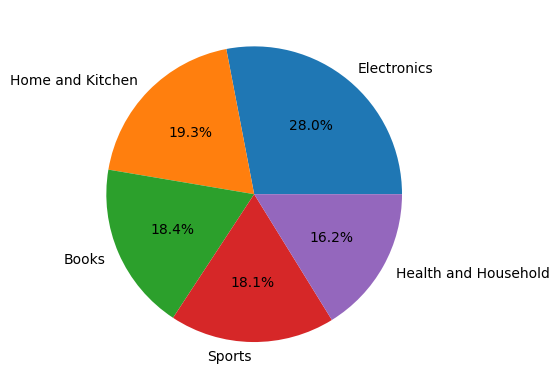

In [ ]:
query = """
SELECT p.category, SUM(s.quantity) as total_sales
FROM sales s
JOIN products p ON s.id_product = p.id_product
GROUP BY p.category
ORDER BY total_sales DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(f"Category: {row[0]}, Total Sales: {row[1]}")

plt.pie([row[1] for row in results], labels=[row[0]
        for row in results], autopct='%1.1f%%')

## 1.2. <a id='toc1_2_'></a>[Which product has the highest sales (qty)?](#toc0_)

In [4]:
query = """
SELECT p.name, SUM(s.quantity) as total_sales
FROM products p
JOIN sales s ON p.id_product = s.id_product
GROUP BY p.name
ORDER BY total_sales DESC
LIMIT 1;
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(f"Top-Selling Product: {row[0]}, Total Sales: {row[1]}")

Top-Selling Product: Incidunt, Total Sales: 317


## 1.3. <a id='toc1_3_'></a>[List the top 10 buyers in $](#toc0_)

Top Client 1: Ana Lívia Casa Grande, Total Expense: 56744.71
Top Client 2: Brayan Viana, Total Expense: 53685.59
Top Client 3: Sr. Henrique Caldeira, Total Expense: 53548.02
Top Client 4: Esther Pereira, Total Expense: 52262.93
Top Client 5: Rafael Araújo, Total Expense: 51809.13
Top Client 6: Benício Moraes, Total Expense: 50497.75
Top Client 7: Dr. Felipe Marques, Total Expense: 50388.98
Top Client 8: Antonella Rezende, Total Expense: 48568.78
Top Client 9: Srta. Ana Sophia da Cruz, Total Expense: 48401.36
Top Client 10: Kevin Moraes, Total Expense: 47176.87


Text(0, 0.5, 'Total Expense ($)')

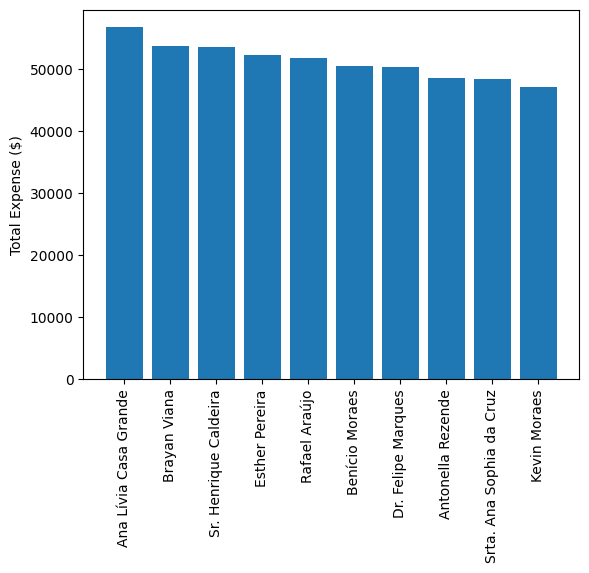

In [5]:
query = """
SELECT c.client_name, SUM(s.quantity * p.price) as total_expense
FROM clients c
JOIN sales s ON c.id_client = s.id_client
JOIN products p ON s.id_product = p.id_product
GROUP BY c.client_name
ORDER BY total_expense DESC
LIMIT 10;
"""
cursor.execute(query)
results = cursor.fetchall()
for idx, row in enumerate(results):
    print(f"Top Client {idx + 1}: {row[0]}, Total Expense: {row[1]:.2f}")

plt.bar([row[0] for row in results], [row[1] for row in results])
plt.xticks(rotation=90)
plt.ylabel('Total Expense ($)')

## 1.4. <a id='toc1_4_'></a>[Find the average sales per day](#toc0_)

In [ ]:
query = """
SELECT s.sale_date, AVG(s.quantity * p.price) as avg_sales_per_day
FROM sales s
JOIN products p ON s.id_product = p.id_product
GROUP BY s.sale_date
ORDER BY s.sale_date DESC;
"""
cursor.execute(query)
results = pd.DataFrame(cursor.fetchall())

print(results.describe())

                 1
count   347.000000
mean   2956.425263
std    1615.073206
min     146.670000
25%    1757.295000
50%    2782.543333
75%    3903.840000
max    8780.220000


## 1.5. <a id='toc1_5_'></a>[Calculate the total income by month and year](#toc0_)

   Year Month  Total Income
0  2024    09      49145.79
1  2024    10     253950.83
2  2024    11     235424.27
3  2024    12     274871.71
4  2025    01     247358.95


<Axes: xlabel='Year-Month'>

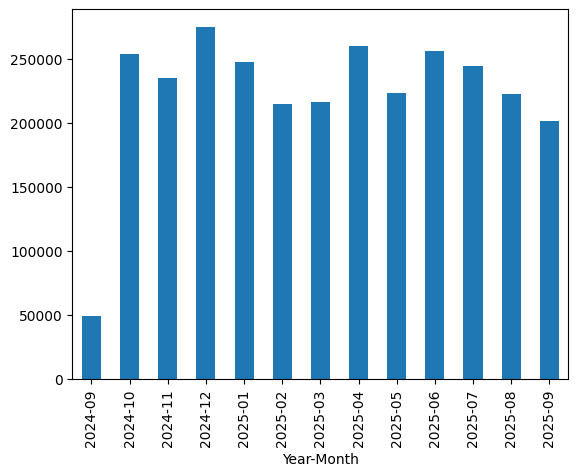

In [7]:
query = """
SELECT strftime('%Y', s.sale_date) as year, strftime('%m', s.sale_date) as month, SUM(s.quantity * p.price) as total_income
FROM sales s
JOIN products p ON s.id_product = p.id_product
GROUP BY year, month
ORDER BY year, month;
"""

cursor.execute(query)
results = cursor.fetchall()

# Exibir resultados de forma tabular
df = pd.DataFrame(results, columns=["Year", "Month", "Total Income"])
print(df.head())

# Visualização opcional
df["Year-Month"] = df["Year"] + '-' + df["Month"]
df.plot(x="Year-Month", y="Total Income", kind="bar", legend=False)

## 1.6. <a id='toc1_6_'></a>[Identify the category of product that generated the highest income in a month](#toc0_)

Lets select 2025-06 as the month to calculate the highest income

               Category  Total Income
0           Electronics      69364.97
1      Home and Kitchen      64034.84
2                 Books      63054.60
3                Sports      45302.01
4  Health and Household      14780.53


<Axes: title={'center': '2025-06'}, xlabel='Category'>

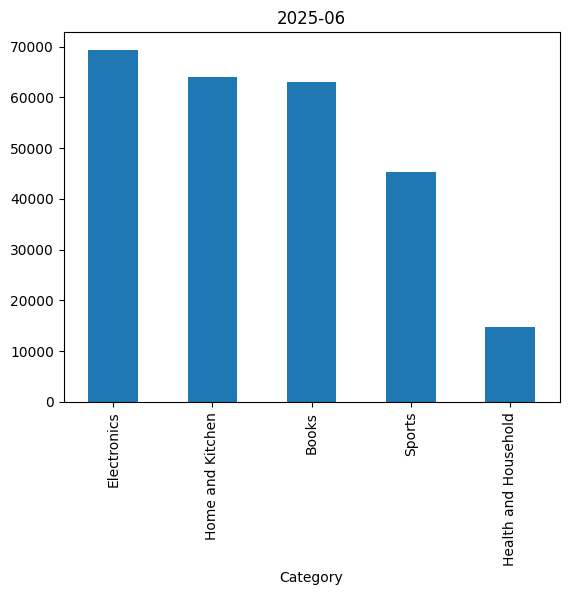

In [8]:
month = '2025-06'

query = """
SELECT p.category, SUM(s.quantity * p.price) as category_income
FROM sales s
JOIN products p ON s.id_product = p.id_product
WHERE STRFTIME('%Y-%m', s.sale_date) = ?
GROUP BY p.category
ORDER BY category_income DESC;
"""

cursor.execute(query, (month,))
results = cursor.fetchall()

# Exibir resultados de forma tabular
df = pd.DataFrame(results, columns=["Category", "Total Income"])
print(df.head())

# Visualização opcional
df.plot(x="Category", y="Total Income", title=month, kind="bar", legend=False)

## 1.7. <a id='toc1_7_'></a>[Find clients that made only one purchase](#toc0_)

In [9]:
query = """
SELECT c.client_name, COUNT(s.id_sale) as purchase_count
FROM clients c
JOIN sales s ON c.id_client = s.id_client
GROUP BY c.client_name
HAVING purchase_count = 1;
"""
cursor.execute(query)
results = cursor.fetchall()

if not results:
    print("No clients with exactly one purchase found.")
else:
    print(f"Clients with exactly one purchase: {len(results)}")
    for row in results:
        print(f"Client: {row[0]}, Purchase Count: {row[1]}")

No clients with exactly one purchase found.


## 1.8. <a id='toc1_8_'></a>[Calculate the contribution percentage of each category for the total sales](#toc0_)

## 1.9. <a id='toc1_9_'></a>[Use a subquery to calculate the total income by client and list the top 20%](#toc0_)

## 1.10. <a id='toc1_10_'></a>[Use window functions (`RANK`, `ROW_NUMBER()`) to classify products by sells in each category](#toc0_)

## 1.11. <a id='toc1_11_'></a>[Identify the first and last purchase of each client](#toc0_)